In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r"E:/gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [6]:
df.shape

(847, 2)

In [7]:
print(f"Data range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices available from - 1950-01 to 2020-07


In [8]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [9]:
df['month']= date
df.drop('Date', axis =1, inplace= True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


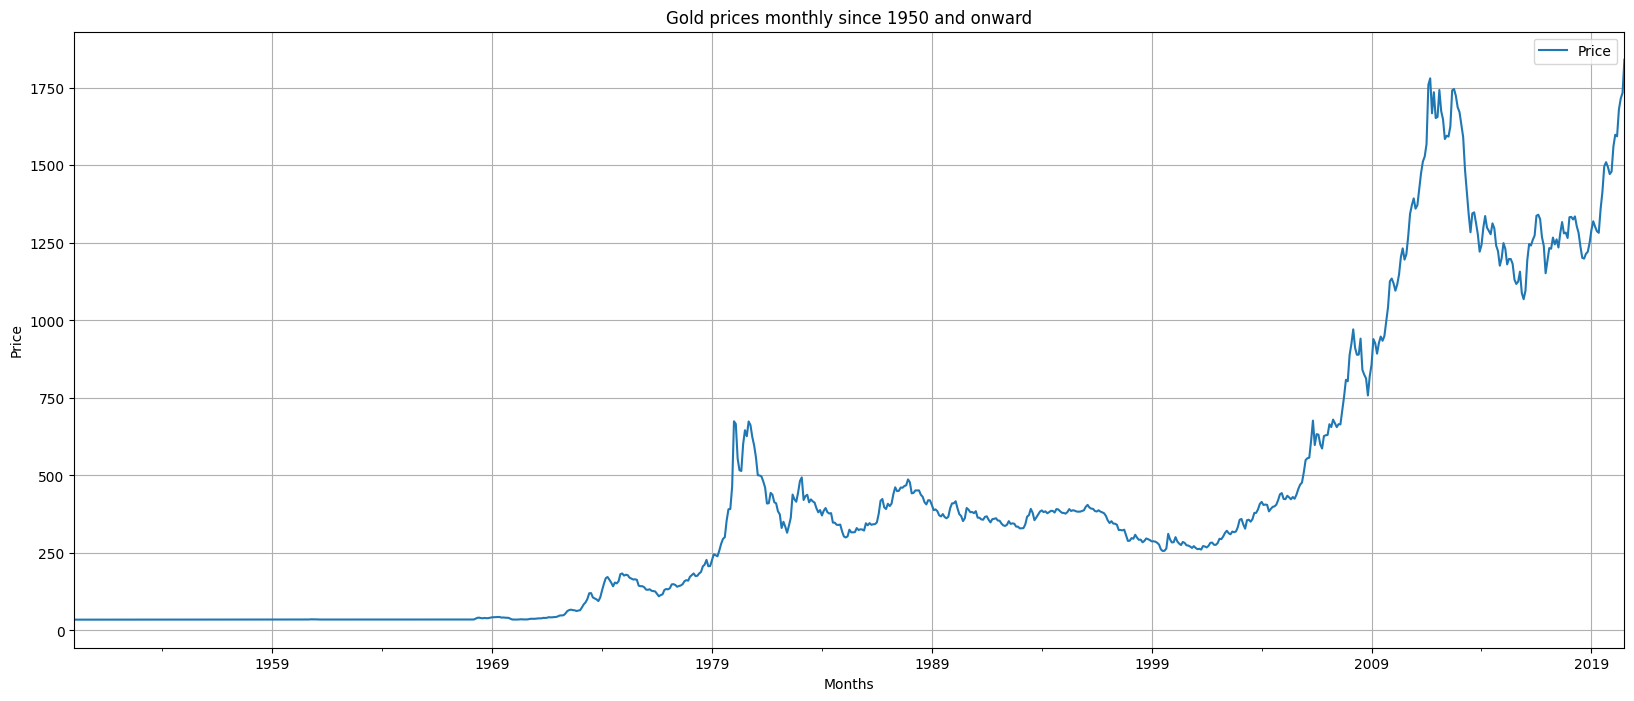

In [10]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 and onward")
plt.xlabel("Months")
plt.ylabel('Price')
plt.grid();

In [11]:
round (df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


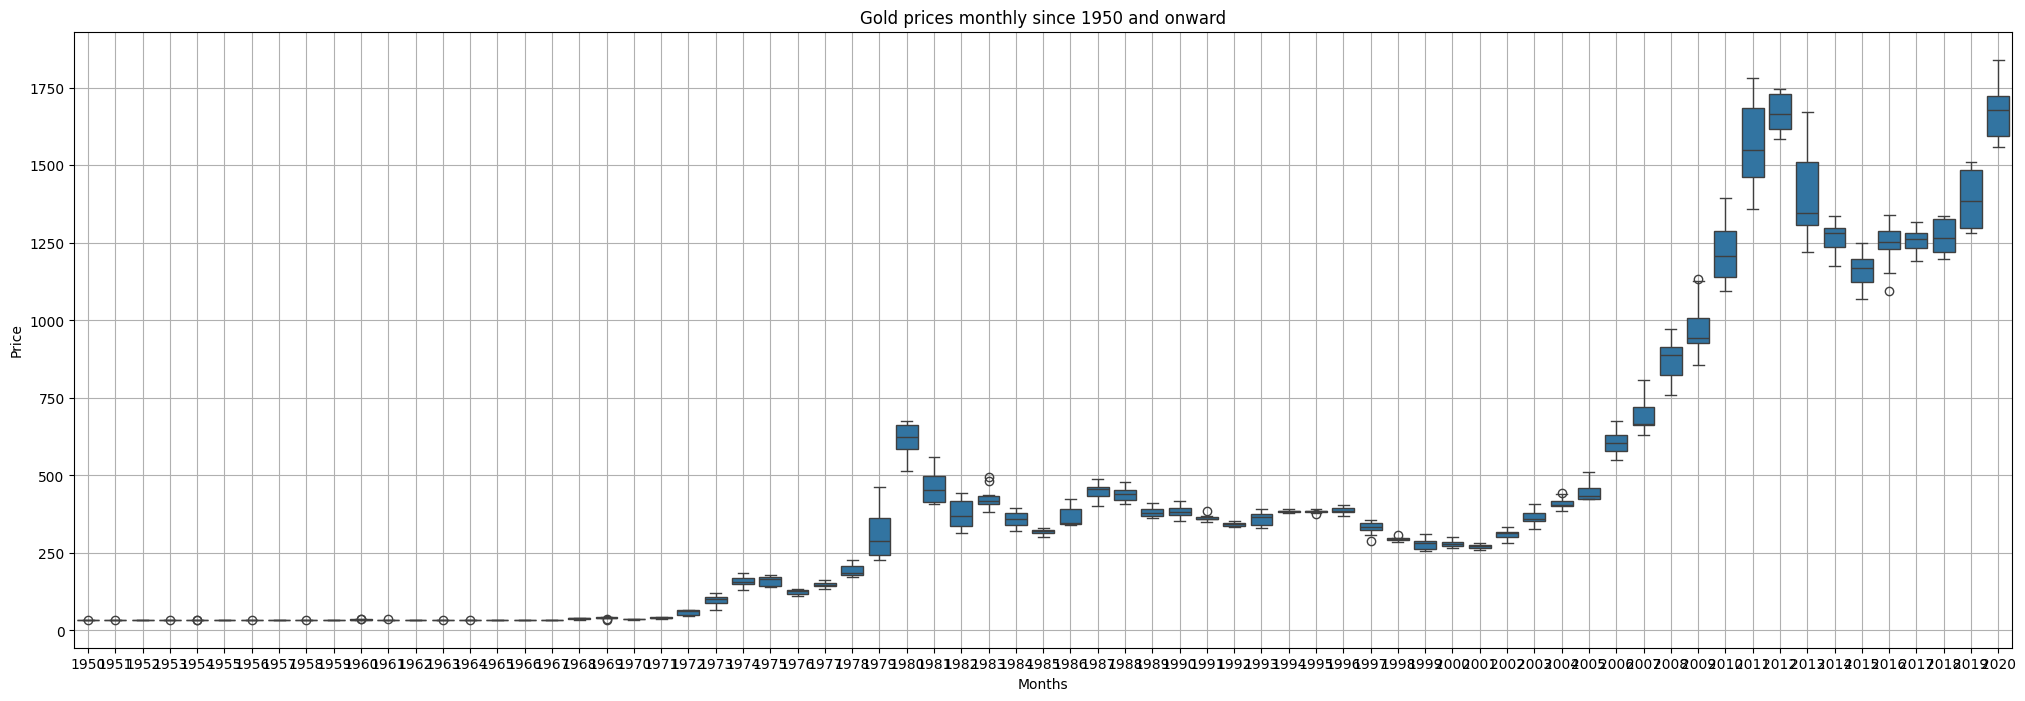

In [12]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y= df.values[:,0], ax=ax)
plt.title("Gold prices monthly since 1950 and onward")
plt.xlabel("Months")
plt.ylabel('Price')

plt.grid();

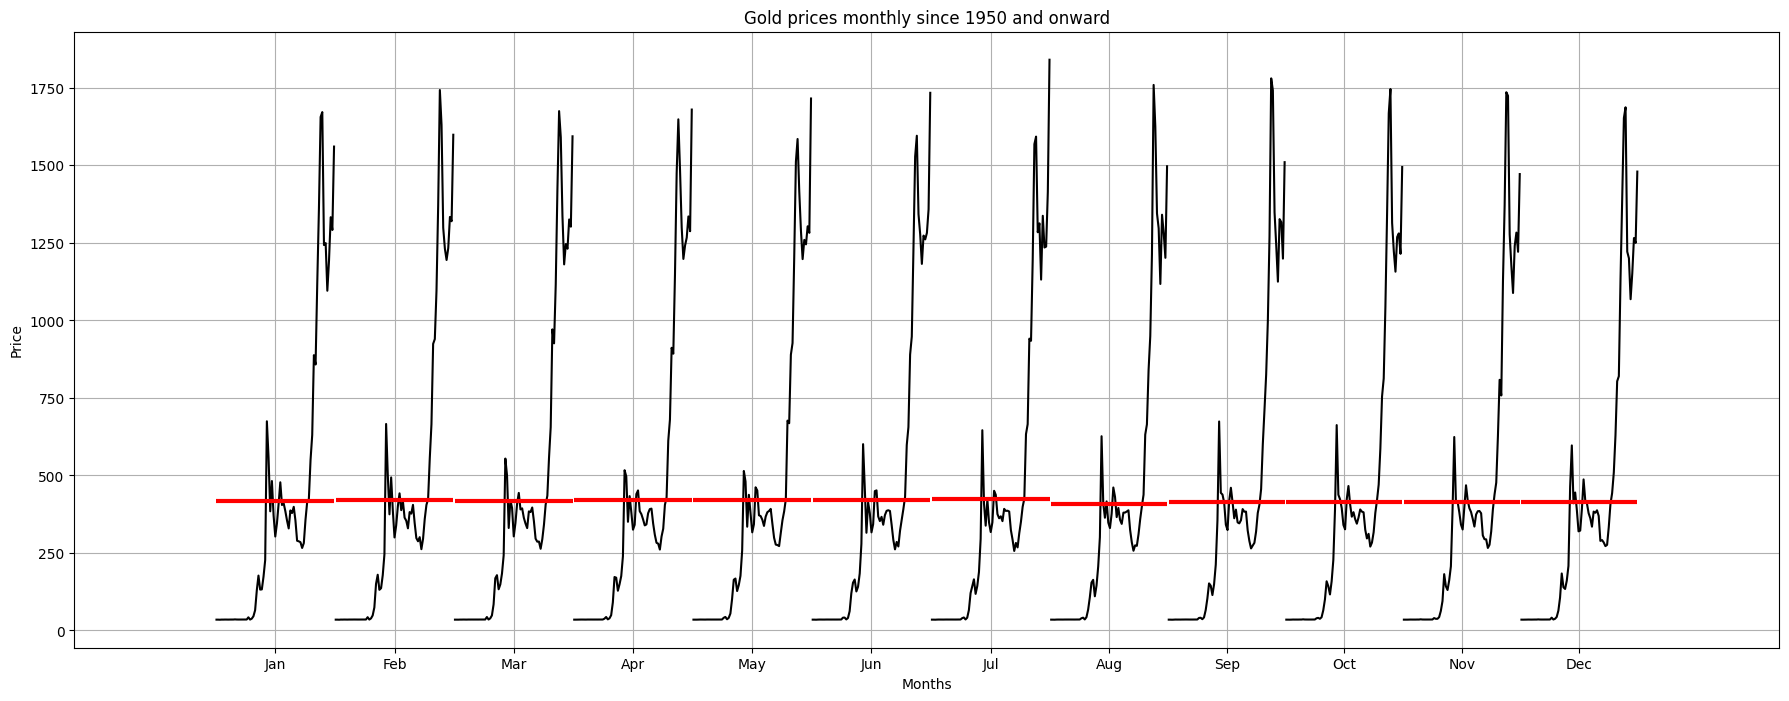

In [13]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax=plt.subplots(figsize=(22,8))
month_plot(df,ylabel= 'gold price',ax=ax)
plt.title("Gold prices monthly since 1950 and onward")
plt.xlabel("Months")
plt.ylabel('Price')
plt.grid();

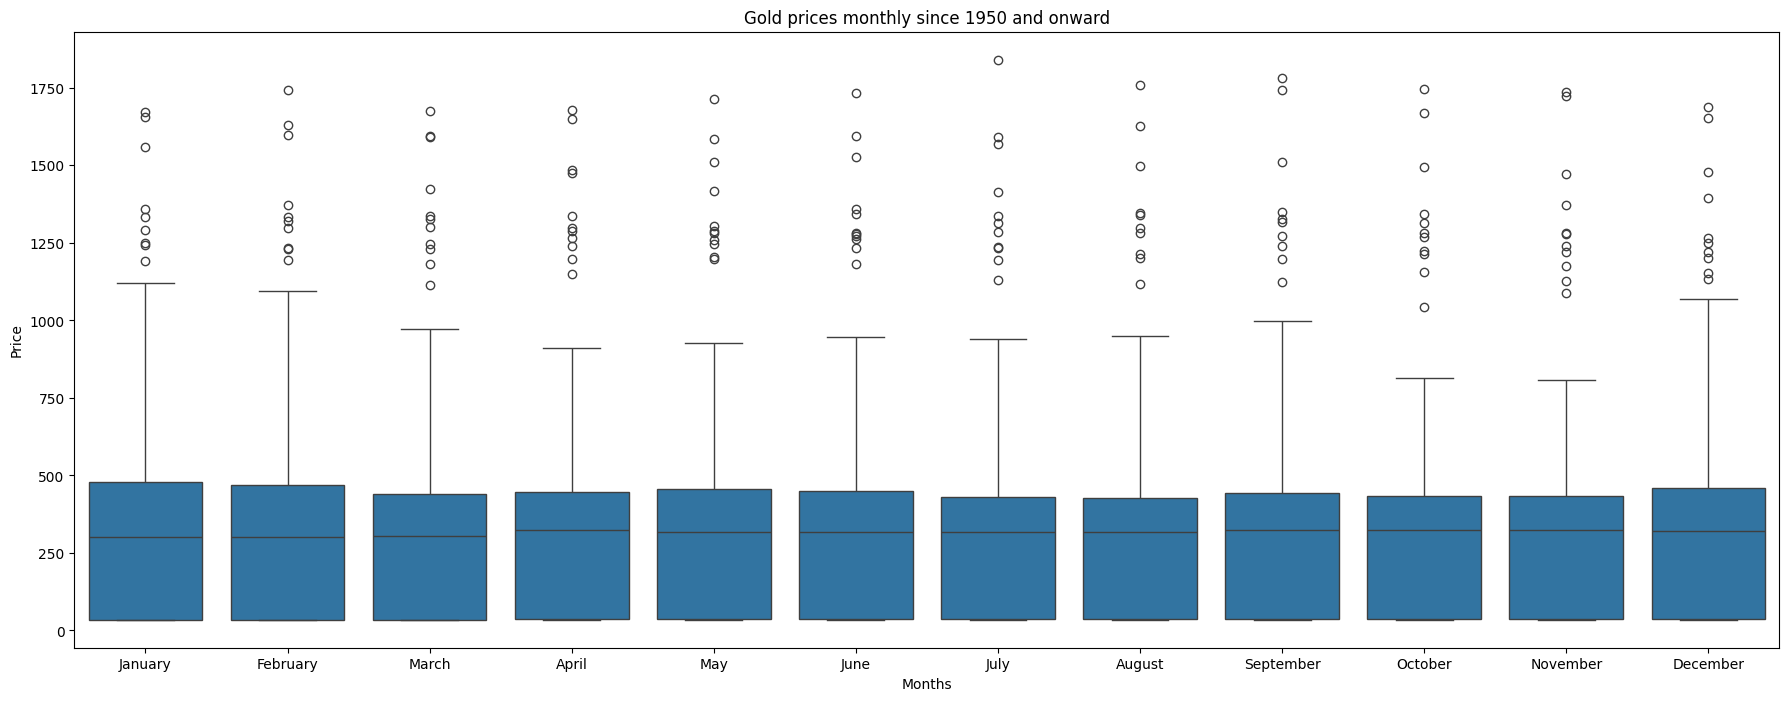

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y = df.values[:, 0], ax=ax)
plt.title("Gold prices monthly since 1950 and onward")
plt.xlabel("Months")
plt.ylabel('Price')
plt.show();

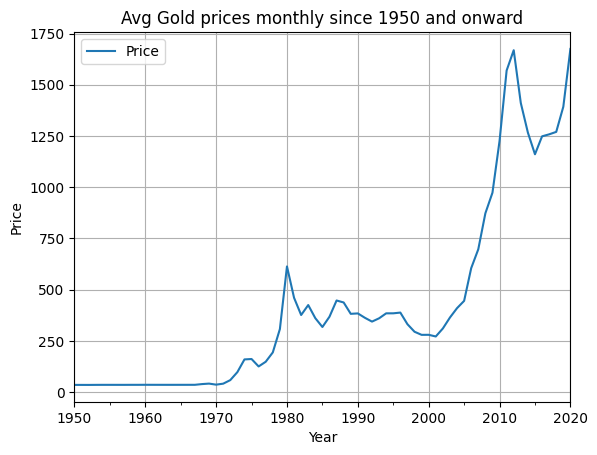

In [15]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Avg Gold prices monthly since 1950 and onward")
plt.xlabel("Year")
plt.ylabel('Price')
plt.grid();

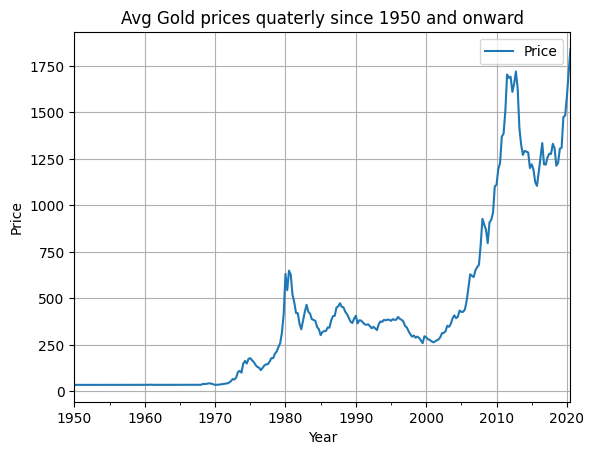

In [16]:
df_quarterly_sum=df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("Avg Gold prices quaterly since 1950 and onward")
plt.xlabel("Year")
plt.ylabel('Price')
plt.grid();

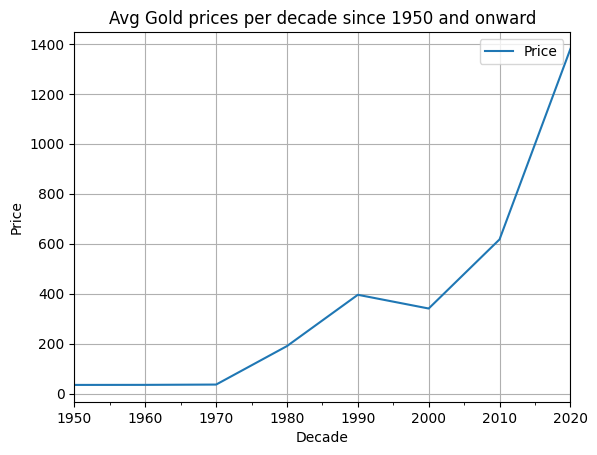

In [17]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Avg Gold prices per decade since 1950 and onward")
plt.xlabel("Decade")
plt.ylabel('Price')
plt.grid();

In [18]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True, right_index=True)
df_1['Cov_pct']=((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


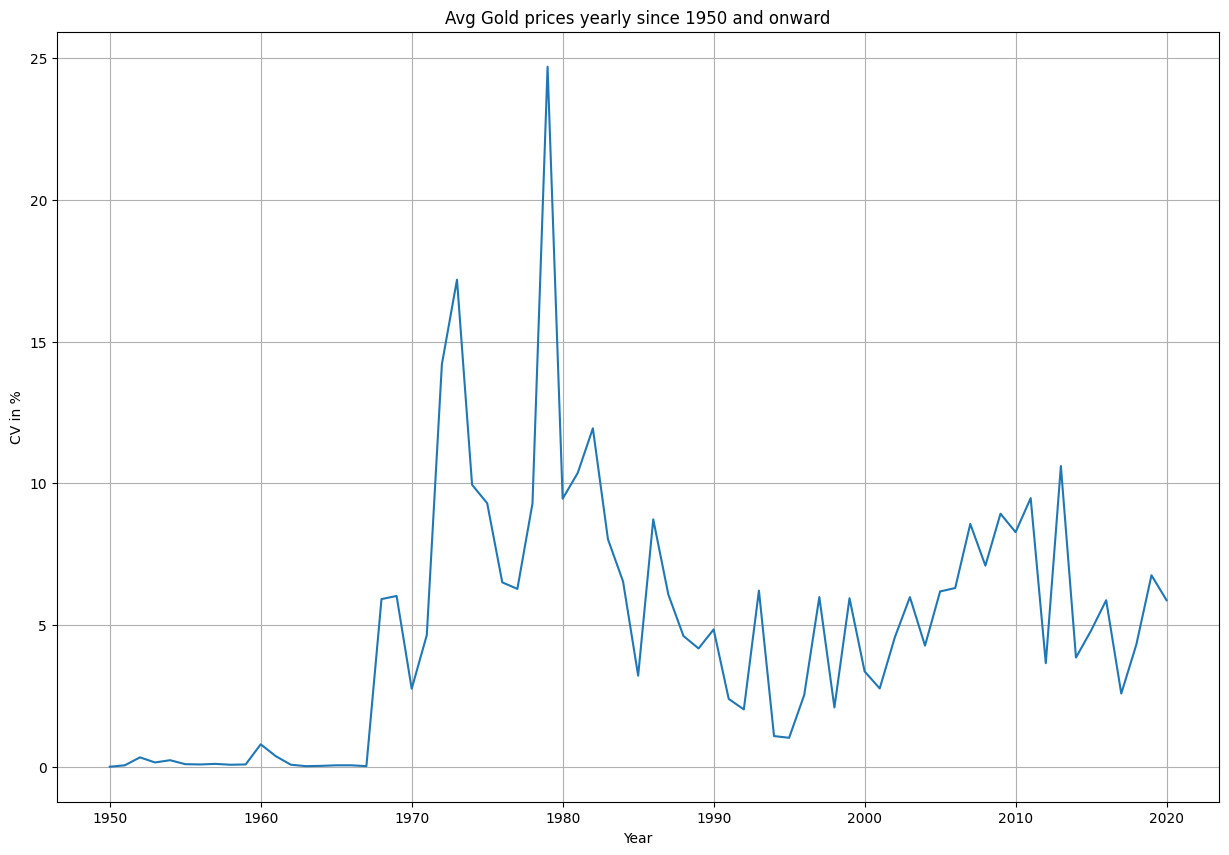

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title("Avg Gold prices yearly since 1950 and onward")
plt.xlabel("Year")
plt.ylabel('CV in %')
plt.grid();

In [20]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]


In [21]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


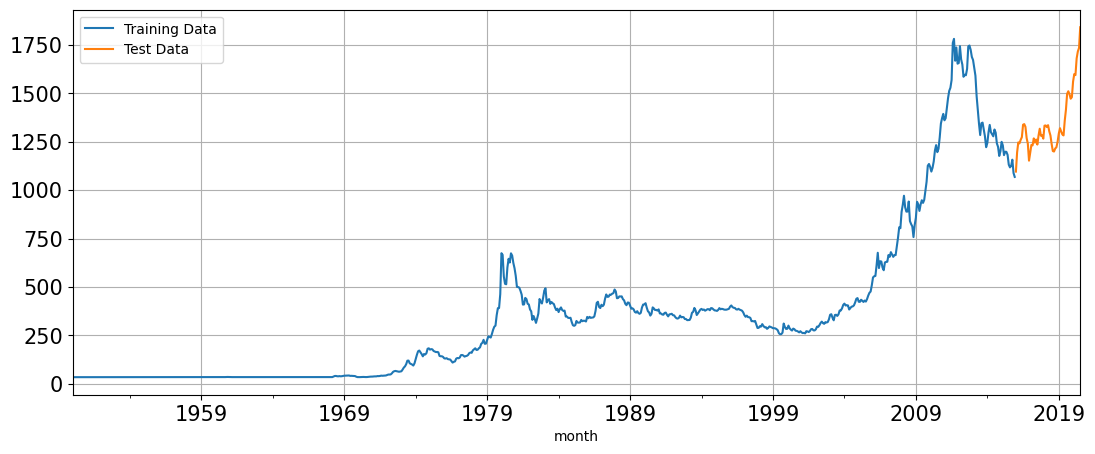

In [22]:
train["Price"].plot(figsize=(13,5), fontsize=15)
test["Price"].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [23]:
train_time=[i+1 for i in range (len(train))]
test_time = [i+len (train) +1 for i in range (len (test))]
len (train_time),len(test_time)

(792, 55)

In [24]:
LR_train = train.copy()
LR_test=test.copy()

In [25]:
LR_train['time'] = train_time
LR_test['time']=test_time

In [26]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

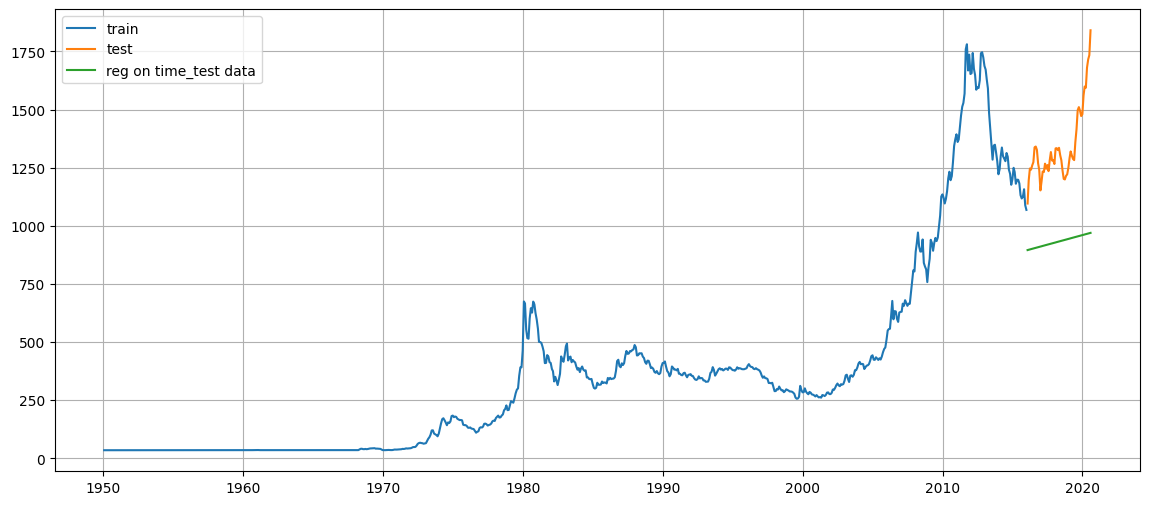

In [27]:
test_predictions_model1=lr.predict(LR_test[['time']])
LR_test['forecast']= test_predictions_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label='reg on time_test data')
plt.legend(loc='best')
plt.grid();

In [28]:
def mape(actual, pred): 
    return round ((np.mean(abs(actual-pred)/actual))*100,2)

In [29]:
mape_model1_test= mape(test['Price'].values, test_predictions_model1)
print("Mape is %3.3f"%(mape_model1_test),"%")

Mape is 29.760 %


In [30]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index = ["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [31]:
Naive_train=train.copy()
Naive_test=test.copy()


In [32]:
Naive_test['naive']= np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

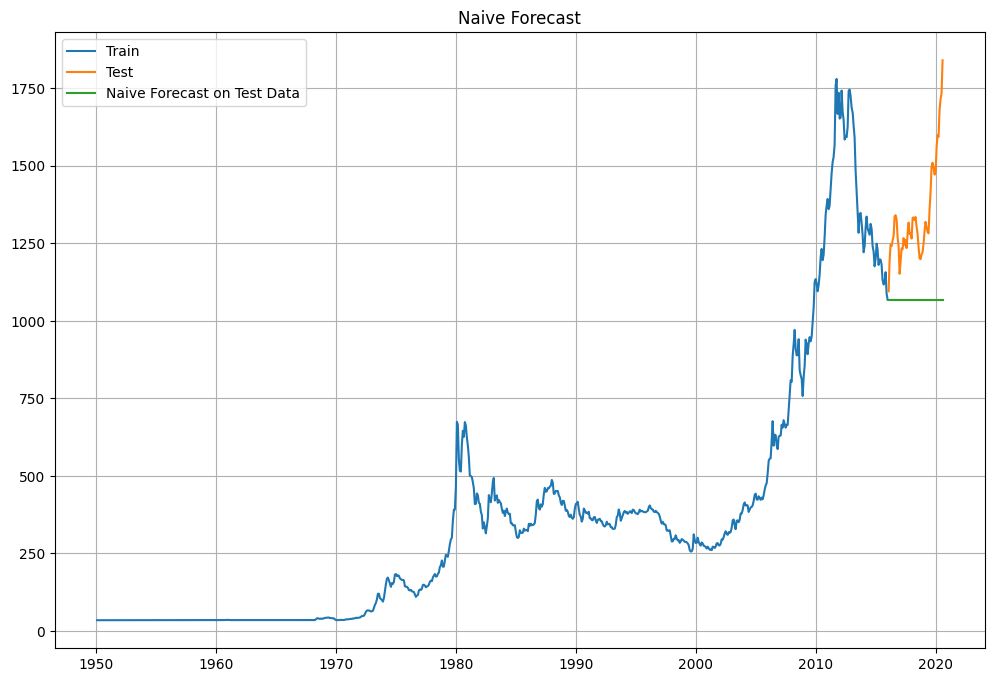

In [33]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(Naive_test['naive'],label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [34]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive forecast on the Test Date, MAPE is %3.3f" %(mape_model2_test),"%")

For Naive forecast on the Test Date, MAPE is 19.380 %


In [35]:
resultsDF_2 = pd.DataFrame({'Test MAPE (%)':[mape_model2_test]}, index =['NaiveModel'])
results = pd.concat([results, resultsDF_2])
results

,Test Mape (%),Test MAPE (%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [36]:
final_model= ExponentialSmoothing(df,
                                 trend='additive',
                                 seasonal= 'additive').fit(smoothing_level=0.4,
                                                          smoothing_trend=0.3,
                                                          smoothing_seasonal=0.6)

In [37]:
MAPE_final_model=mape(df['Price'].values,final_model.fittedvalues)
print("MAPE:", MAPE_final_model)

MAPE: 17.24


In [38]:
prediction = final_model.forecast(steps=len(test))

In [39]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid, ddof=1),
                        'prediction': prediction,
                        'upper_CI': prediction + 1.96*np.std(final_model.resid, ddof=1)})
pred_df.head()


,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


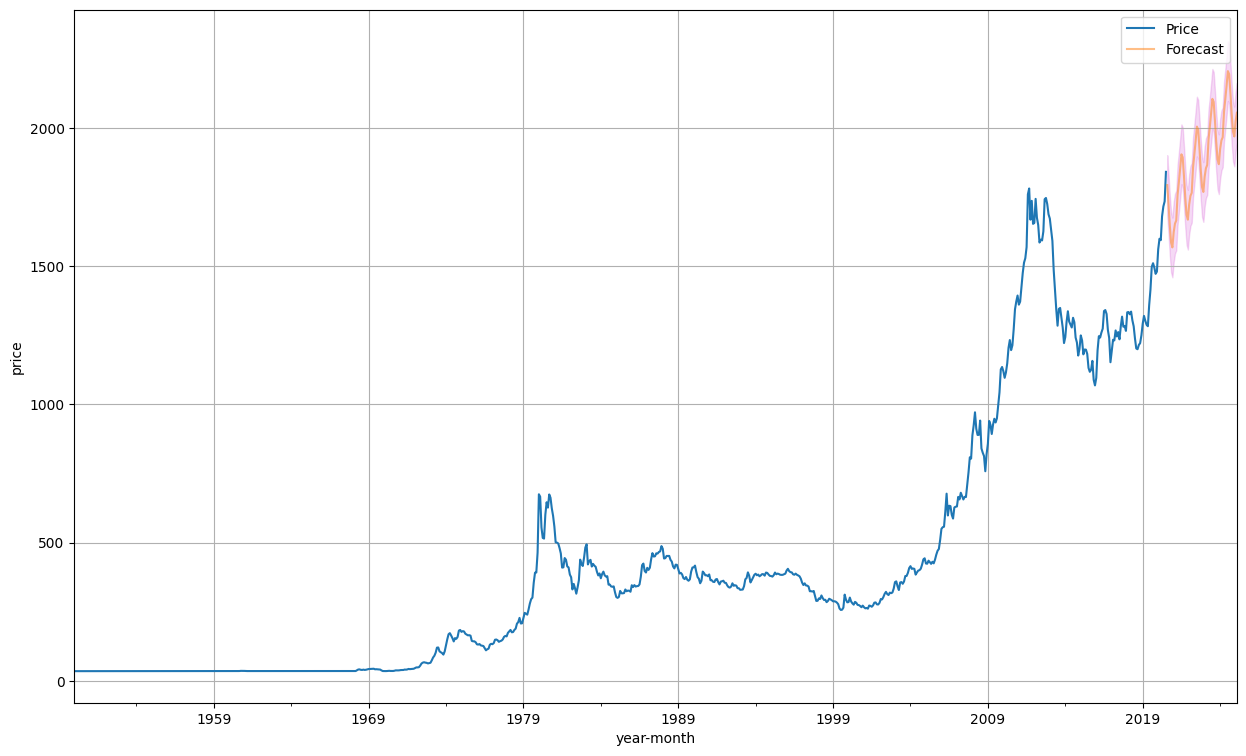

In [40]:
axis = df.plot(label= 'actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'], pred_df['upper_CI'], color='m',alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()